In [1]:
# load packages
import numpy as np
import pandas as pd; pd.set_option('display.max_rows', 1000); pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# root_dir = "/content/gdrive/My Drive/"
# base_dir = root_dir + "/capstone_nyc"

# from google.colab import files # along with 'files.download('xxx.csv')' 

# import os
# # for dirname, _, filenames in os.walk('/kaggle/input'):
# for dirname, _, filenames in os.walk('/content/gdrive'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
# load dataset
df_col = pd.read_csv('NYPD_Motor_Vehicle_Collisions_-_Crashes.zip')

# make column names lower-case
df_col.rename(columns={c:c.lower() for c in df_col.columns}, inplace=True)

# create new features
df_col['date_time'] = pd.to_datetime(df_col['date'] + ' ' + df_col['time'], format='%m/%d/%Y %H:%M')
df_col['year'] = df_col['date_time'].dt.year
df_col['month'] = df_col['date_time'].dt.month
df_col['dayofweek'] = df_col['date_time'].dt.dayofweek
df_col['hour'] = df_col['date_time'].dt.hour

df_col['is_borough_null'] = df_col['borough'].isnull()
df_col['borough'].fillna('N/A', inplace=True)

df_col['is_location_null'] = df_col['location'].isnull()

C:\Users\bomsoo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# df_col.head()

from bradk.utils import Data_Stat
Data_Stat(df_col)

,date,time,borough,zip code,latitude,longitude,location,on street name,cross street name,off street name,number of persons injured,number of persons killed,number of pedestrians injured,number of pedestrians killed,number of cyclist injured,number of cyclist killed,number of motorist injured,number of motorist killed,contributing factor vehicle 1,contributing factor vehicle 2,contributing factor vehicle 3,contributing factor vehicle 4,contributing factor vehicle 5,unique id,vehicle type code 1,vehicle type code 2,vehicle type code 3,vehicle type code 4,vehicle type code 5,date_time,year,month,dayofweek,hour,is_borough_null,is_location_null
0,08/24/2019,11:53,N/A,NaN,NaN,NaN,NaN,CROSS BRONX EXPY RAMP,NaN,NaN,3,0,0,0,0,0,3,0,Other Vehicular,Aggressive Driving/Road Rage,NaN,NaN,NaN,4194003,Sedan,Sedan,NaN,NaN,NaN,2019-08-24 11:53:00,2019,8,5,11,True,True
1,08/24/2019,13:22,N/A,NaN,NaN,NaN,NaN,VERRAZANO BRIDGE LOWER,NaN,NaN,0,0,0,0,0,0,0,0,Reaction to Uninvolved Vehicle,Unspecified,NaN,NaN,NaN,4194562,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,2019-08-24 13:22:00,2019,8,5,13,True,True
2,08/24/2019,23:00,N/A,NaN,NaN,NaN,NaN,MEEKER AVENUE,NaN,NaN,0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4194211,Sedan,Motorcycle,NaN,NaN,NaN,2019-08-24 23:00:00,2019,8,5,23,True,True
Types,object,object,object,object,float64,float64,object,object,object,object,float64,float64,int64,int64,int64,int64,int64,int64,object,object,object,object,object,int64,object,object,object,object,object,datetime64[ns],int64,int64,int64,int64,bool,bool
# of nulls,0,0,0,470290,192354,192354,192354,303289,513273,1347110,17,31,0,0,0,0,0,0,4065,208430,1457563,1537330,1552894,0,5065,254794,1428312,1509512,1547785,0,0,0,0,0,0,0
% of nulls,0,0,0,30.1809,12.3443,12.3443,12.3443,19.4636,32.9393,86.4509,0.00109098,0.00198943,0,0,0,0,0,0,0.260872,13.376,93.5392,98.6583,99.6571,0,0.325047,16.3514,91.6621,96.8731,99.3292,0,0,0,0,0,0,0
# of uniques,2611,1440,6,421,115200,91570,204821,11414,17936,134896,27,7,13,4,5,3,27,6,61,61,50,39,27,1558237,663,638,134,69,47,779811,8,12,7,24,2,2


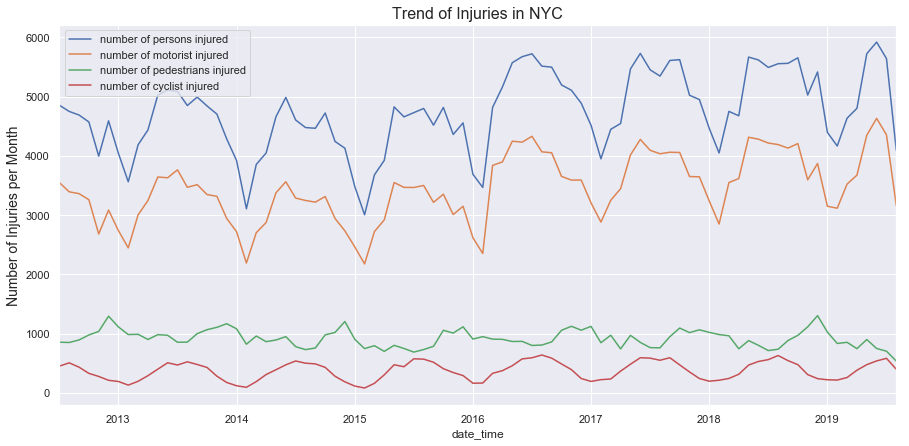

In [4]:
pp = df_col.set_index('date_time').resample('M').sum()

fig, ax = plt.subplots(1, 1, figsize=(15,7))
pp.plot(ax=ax, y='number of persons injured').set_ylabel('Number of Injuries per Month', fontsize=14)
pp.plot(ax=ax, y='number of motorist injured').set_ylabel('Number of Injuries per Month', fontsize=14)
pp.plot(ax=ax, y='number of pedestrians injured').set_ylabel('Number of Injuries per Month', fontsize=14)
pp.plot(ax=ax, y='number of cyclist injured').set_ylabel('Number of Injuries per Month', fontsize=14)
ax.set_title('Trend of Injuries in NYC', fontsize=16)
plt.show()

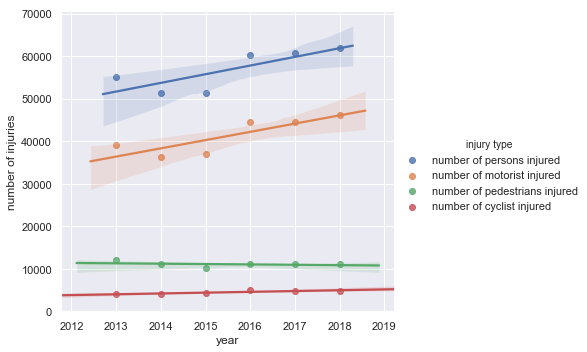

In [5]:
pp = df_col.groupby(['year']).sum().reset_index(drop=False)
pp = pp.loc[(pp['year'] >= 2013) & (pp['year'] <= 2018)] # only year = [2014,2015,2016,2017,2018]
pp = pd.melt(pp, 
             id_vars=['year'], 
             value_vars=['number of persons injured','number of motorist injured','number of pedestrians injured','number of cyclist injured'],
             var_name='injury type', 
             value_name='number of injuries')

sns.lmplot(x='year', y="number of injuries", hue='injury type', data=pp, aspect=1.2) # https://seaborn.pydata.org/tutorial/regression.html
plt.show()

In [6]:
df_col.groupby(['borough'])['borough'].count()

borough
BRONX            150994
BROOKLYN         337558
MANHATTAN        262693
N/A              470103
QUEENS           289093
STATEN ISLAND     47796
Name: borough, dtype: int64

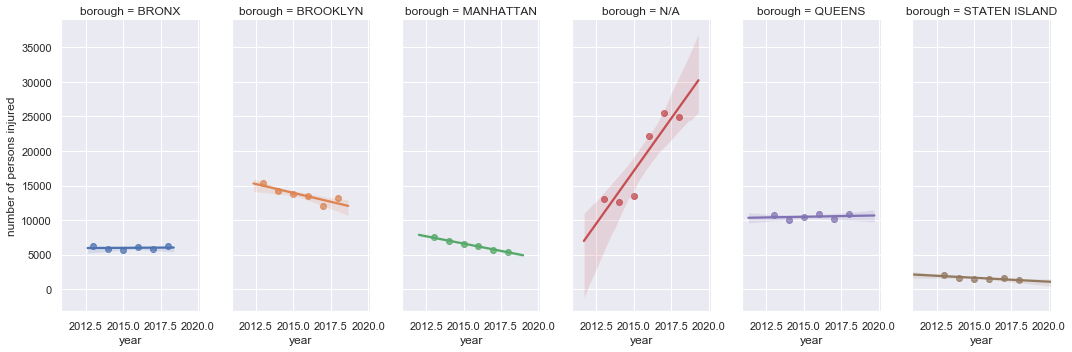

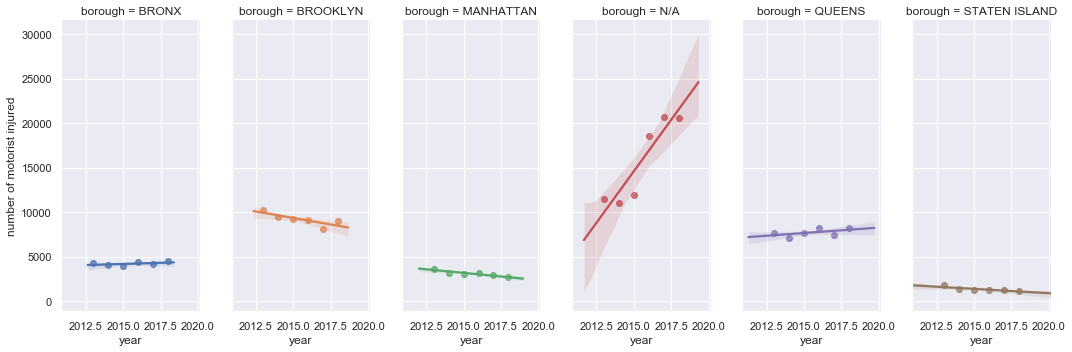

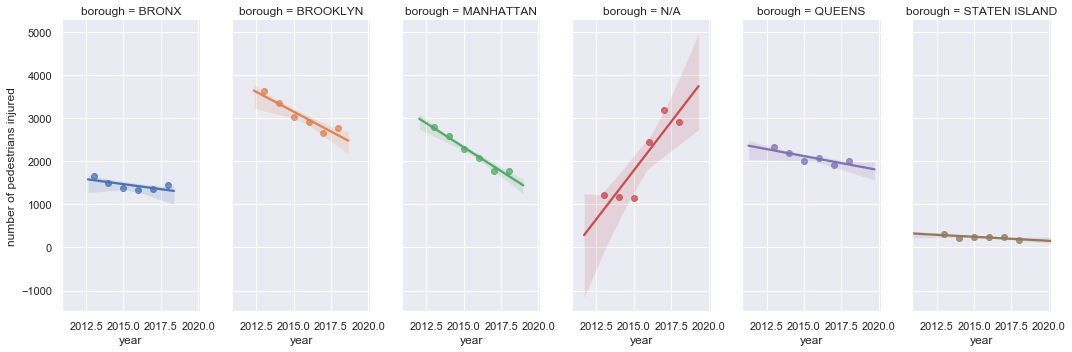

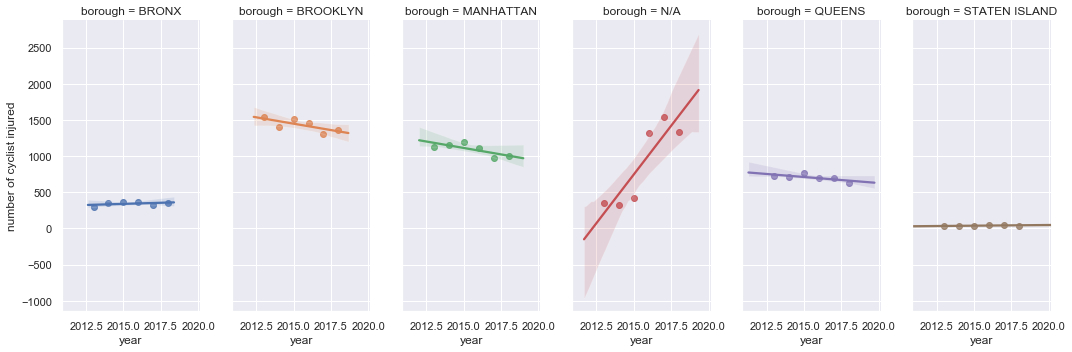

In [7]:
pp = df_col.groupby(['year','borough']).sum().reset_index(drop=False)
pp = pp.loc[(pp['year'] >= 2013) & (pp['year'] <= 2018)] # only year = [2014,2015,2016,2017,2018]

sns.lmplot(x='year', y="number of persons injured", col='borough', hue='borough', data=pp, col_wrap=6, aspect=0.5) # https://seaborn.pydata.org/tutorial/regression.html
sns.lmplot(x='year', y="number of motorist injured", col='borough', hue='borough', data=pp, col_wrap=6, aspect=0.5) # https://seaborn.pydata.org/tutorial/regression.html
sns.lmplot(x='year', y="number of pedestrians injured", col='borough', hue='borough', data=pp, col_wrap=6, aspect=0.5) # https://seaborn.pydata.org/tutorial/regression.html
sns.lmplot(x='year', y="number of cyclist injured", col='borough', hue='borough', data=pp, col_wrap=6, aspect=0.5) # https://seaborn.pydata.org/tutorial/regression.html
plt.show()

In [8]:
print(df_col['latitude'].min())
print(df_col['latitude'].max())
print(df_col['longitude'].min())
print(df_col['longitude'].max())

df_col.groupby(['borough'])['is_location_null'].mean()

0.0
43.344444
-201.35998999999998
0.0


borough
BRONX            0.031001
BROOKLYN         0.022535
MANHATTAN        0.030595
N/A              0.350111
QUEENS           0.021519
STATEN ISLAND    0.025525
Name: is_location_null, dtype: float64

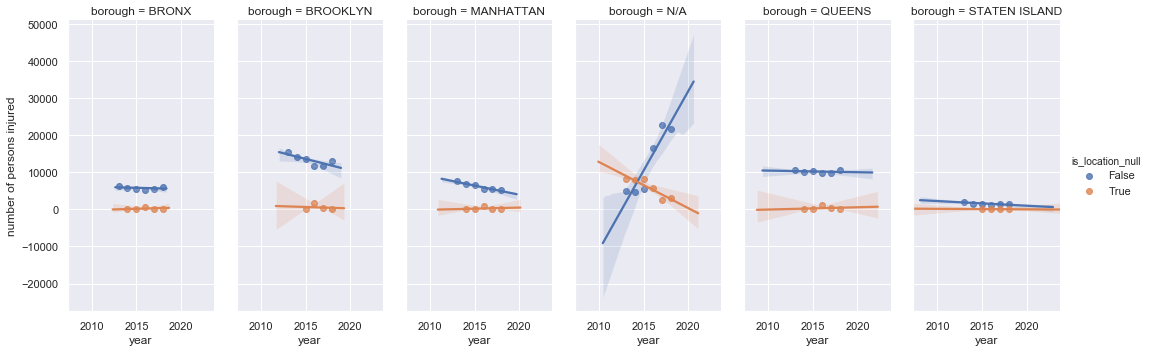

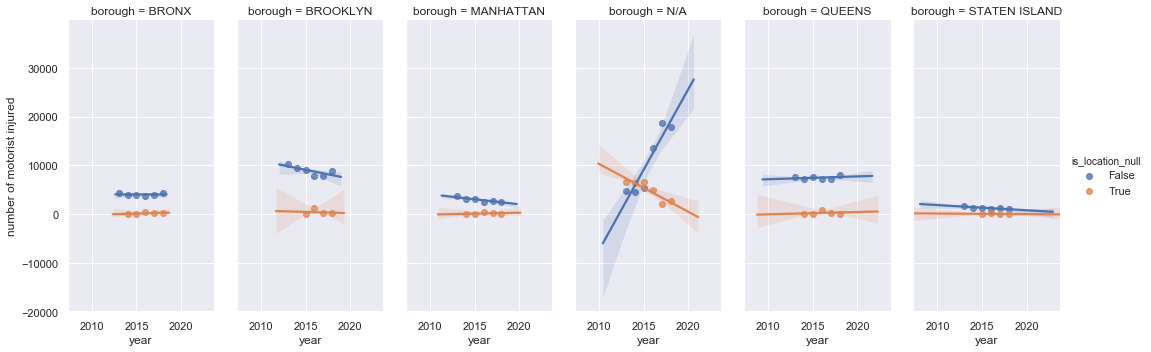

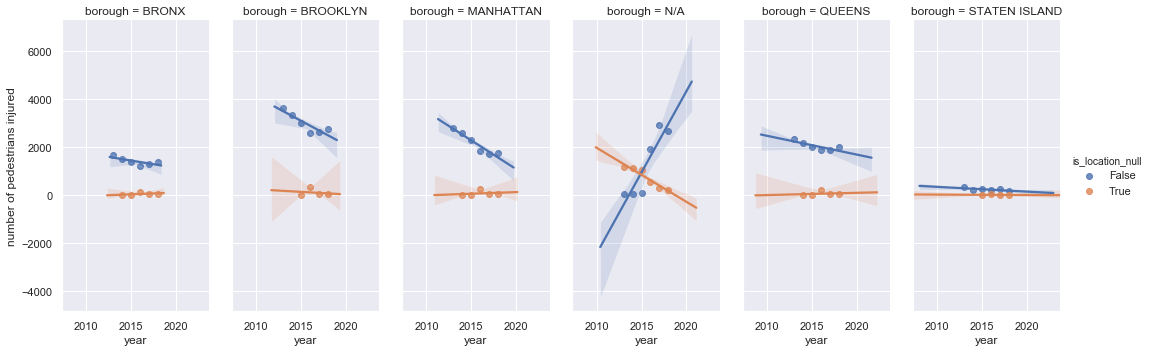

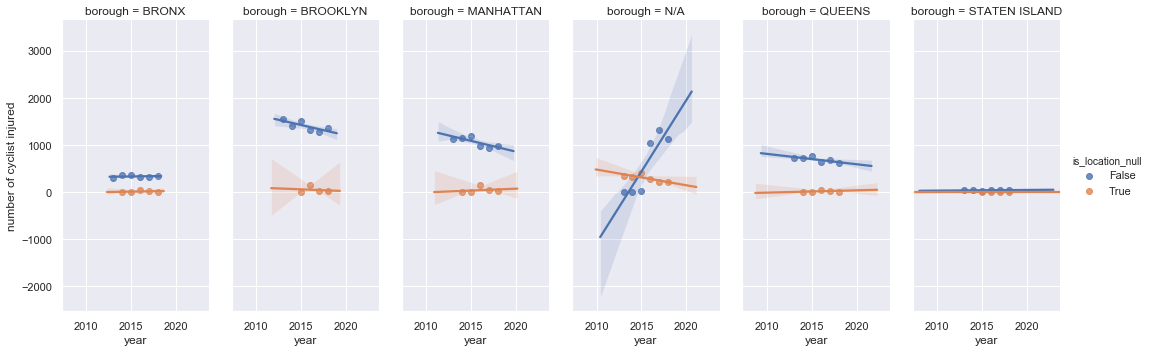

In [9]:
pp = df_col.groupby(['year','borough','is_location_null']).sum().reset_index(drop=False)
pp = pp.loc[(pp['year'] >= 2013) & (pp['year'] <= 2018)] # only year = [2014,2015,2016,2017,2018]

sns.lmplot(x='year', y="number of persons injured", col='borough', hue='is_location_null', data=pp, col_wrap=6, aspect=0.5) # https://seaborn.pydata.org/tutorial/regression.html
sns.lmplot(x='year', y="number of motorist injured", col='borough', hue='is_location_null', data=pp, col_wrap=6, aspect=0.5) # https://seaborn.pydata.org/tutorial/regression.html
sns.lmplot(x='year', y="number of pedestrians injured", col='borough', hue='is_location_null', data=pp, col_wrap=6, aspect=0.5) # https://seaborn.pydata.org/tutorial/regression.html
sns.lmplot(x='year', y="number of cyclist injured", col='borough', hue='is_location_null', data=pp, col_wrap=6, aspect=0.5) # https://seaborn.pydata.org/tutorial/regression.html
plt.show()


(40.45, 40.95)

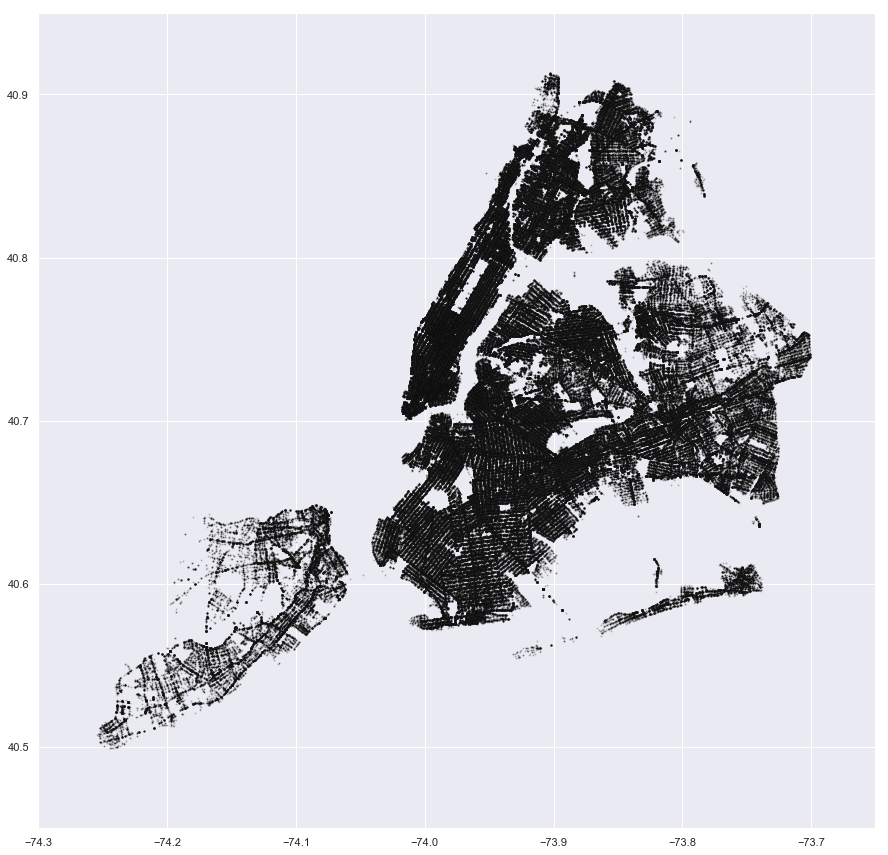

In [10]:
xx = df_col.loc[df_col['is_borough_null']==False, 'longitude']
yy = df_col.loc[df_col['is_borough_null']==False, 'latitude']

fig, ax = plt.subplots(figsize=(15,15))
ax.plot(xx, yy, 'o', markerfacecolor='none', markeredgecolor='k', alpha=0.2, markersize=1)
plt.xlim(-74.3, -73.65)
plt.ylim(40.45, 40.95)

# df_col['LATITUDE'].hist(bins=100)
# df_col['LONGITUDE'].hist(bins=100)

(40.45, 40.95)

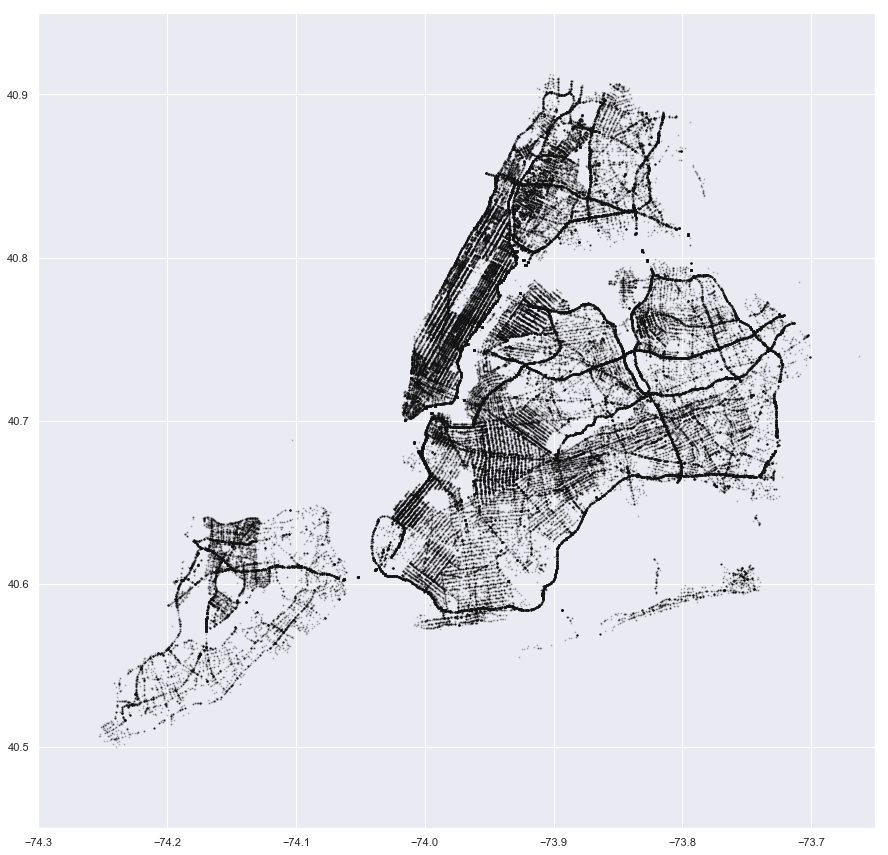

In [11]:
xx = df_col.loc[df_col['is_borough_null']==True, 'longitude']
yy = df_col.loc[df_col['is_borough_null']==True, 'latitude']

fig, ax = plt.subplots(figsize=(15,15))
ax.plot(xx, yy, 'o', markerfacecolor='none', markeredgecolor='k', alpha=0.2, markersize=1)
plt.xlim(-74.3, -73.65)
plt.ylim(40.45, 40.95)

# df_col['LATITUDE'].hist(bins=100)
# df_col['LONGITUDE'].hist(bins=100)

In [12]:
%%time
aa = df_col['on street name'].str.lower().to_string(index=False).split()
aa

Wall time: 39.8 s


In [13]:
# from nltk.metrics.distance import edit_distance
# # http://maf.directory/zp4/abbrev.html
# word = 'lane'
# ww = pd.DataFrame({'word':aa, 'count':0}).groupby('word').count().reset_index().sort_values(by='count', ascending=False)
# ww['ii'] = ww['word'].apply(lambda w: word[0] != w[0])
# ww['ss'] = ww['word'].apply(lambda w: edit_distance(word, w, transpositions = True))
# ww.sort_values(by=['ii','ss'])
#-------------------------------------------------------------------------------
def find_road_type(streetname):
    if len(set(streetname.lower().split()).intersection(['expressway','expressay','expresswaay','expresway','exressway','express','expway','expwy','expre','exway','expy','exwy','exwpy','exp','exp.'])) > 0:
        return 'expressway'
    elif len(set(streetname.lower().split()).intersection(['parkway','parrkway','parlway','parkwway','parkwayy','parkwary','prkwy','pkwy'])) > 0:
        return 'parkway'
#     elif len(set(streetname.lower().split()).intersection(['highway','hwy'])) > 0:
#         return 'highway'
    elif len(set(streetname.lower().split()).intersection(['drive','dr'])) > 0:
        return 'drive'
#     elif ((len(set(streetname.lower().split()).intersection(['drive','dr'])) > 0) &
#           (len(set(streetname.lower().split()).intersection(['fdr'])) == 0)):
#         return 'drive'
#     elif len(set(streetname.lower().split()).intersection(['fdr'])) > 0:
#         return 'fdr drive'
#     elif len(set(streetname.lower().split()).intersection(['broadway'])) > 0:
#         return 'broadway'
#     elif len(set(streetname.lower().split()).intersection(['turnpike','tpke'])) > 0:
#         return 'turnpike'
#     elif len(set(streetname.lower().split()).intersection(['thruway','thruwy','thurway','throughway'])) > 0:
#         return 'thruway'
#     elif len(set(streetname.lower().split()).intersection(['concourse','concours'])) > 0:
#         return 'concourse'
    elif len(set(streetname.lower().split()).intersection(['bridge','bridge/','bridge,','bridgte','brdg','brg'])) > 0:
        return 'bridge'
    
    elif len(set(streetname.lower().split()).intersection(['street','st','st.'])) > 0:
        return 'street'
#     elif len(set(streetname.lower().split()).intersection(['boulevard','blvd'])) > 0:
#         return 'boulevard'
    elif len(set(streetname.lower().split()).intersection(['avenue','ave'])) > 0:
        return 'avenue'
    elif len(set(streetname.lower().split()).intersection(['road','rd'])) > 0:
        return 'road'
    else:
        return 'others'

df_col['road_type'] = df_col['on street name'].apply(lambda x: find_road_type(x) if not pd.isnull(x) else 'N/A')
df_col.groupby('road_type')['unique id'].count()


road_type
N/A           303289
avenue        474065
bridge         11591
drive          15840
expressway     51774
others        173001
parkway        58850
road           53371
street        416456
Name: unique id, dtype: int64

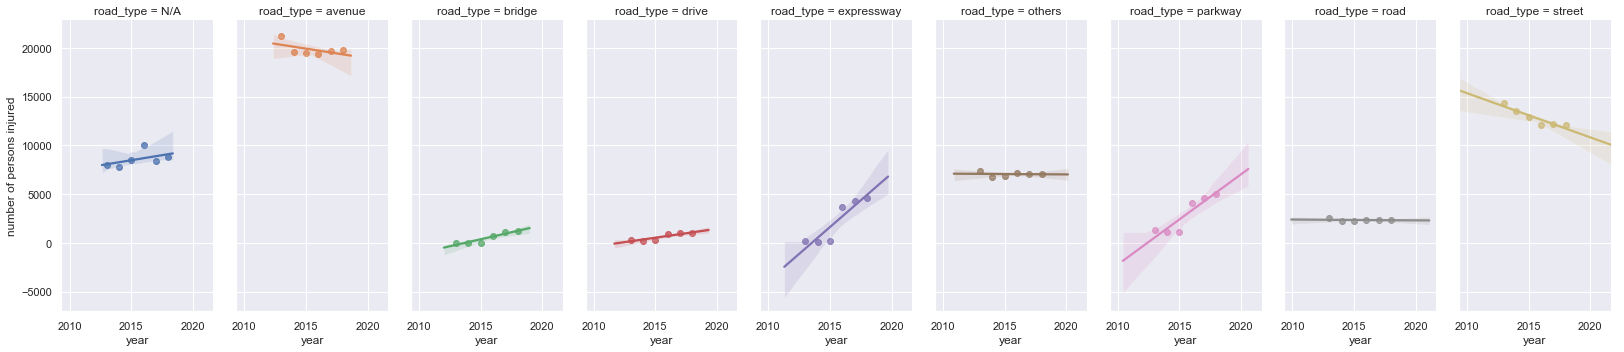

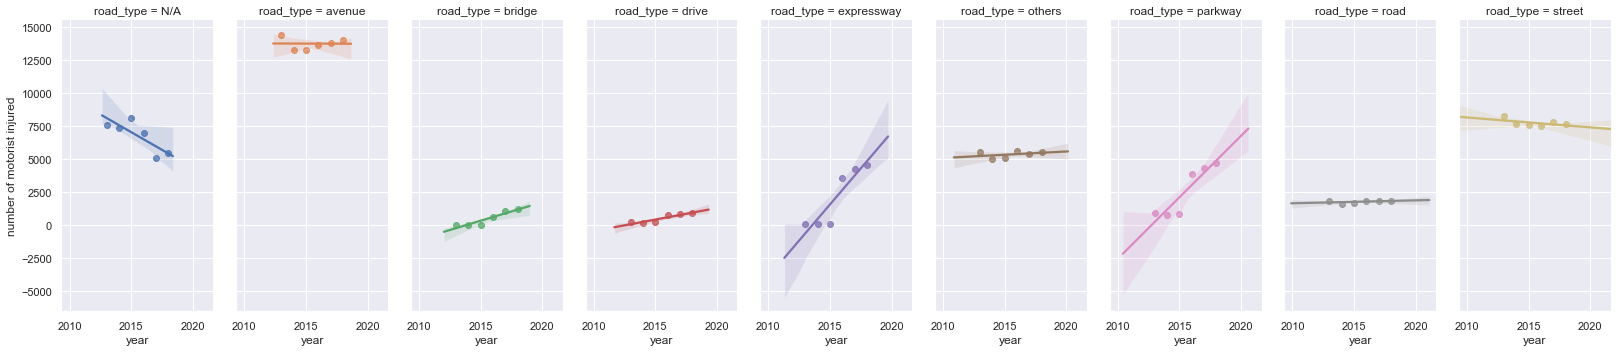

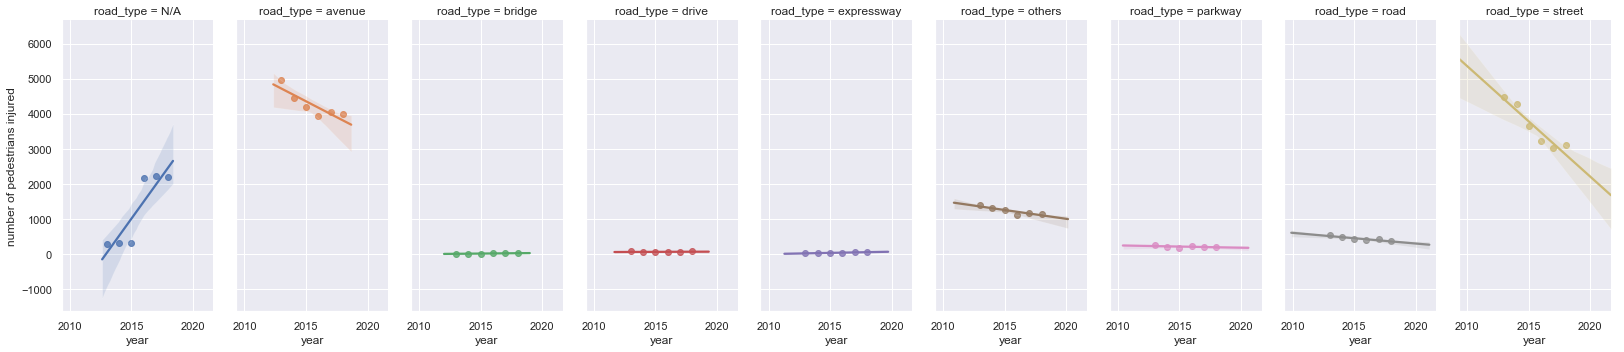

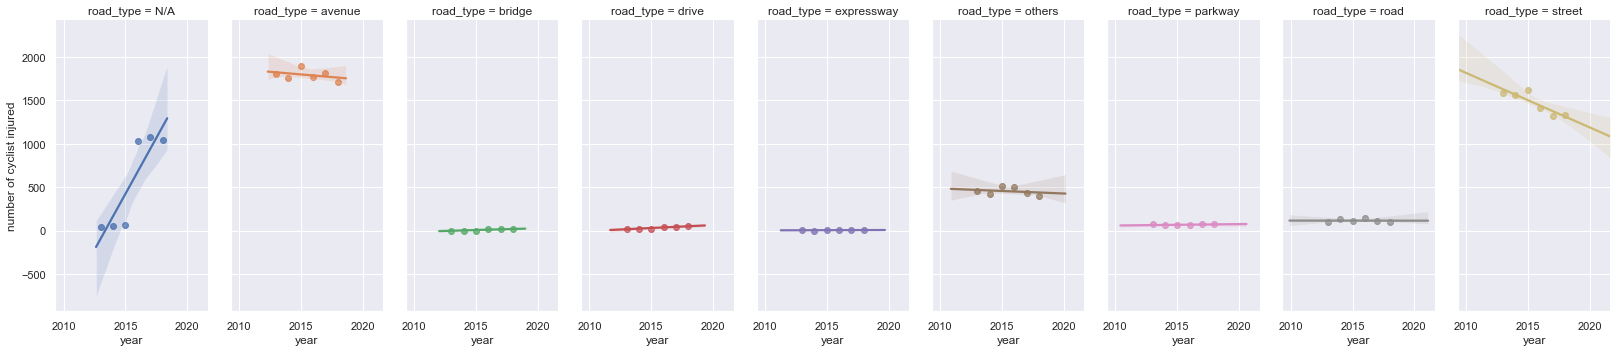

In [14]:
pp = df_col.groupby(['year','road_type']).sum().reset_index(drop=False)
pp = pp.loc[(pp['year'] >= 2013) & (pp['year'] <= 2018)] # only year = [2014,2015,2016,2017,2018]

sns.lmplot(x='year', y="number of persons injured", col='road_type', hue='road_type', data=pp, col_wrap=10, aspect=0.5) # https://seaborn.pydata.org/tutorial/regression.html
sns.lmplot(x='year', y="number of motorist injured", col='road_type', hue='road_type', data=pp, col_wrap=10, aspect=0.5) # https://seaborn.pydata.org/tutorial/regression.html
sns.lmplot(x='year', y="number of pedestrians injured", col='road_type', hue='road_type', data=pp, col_wrap=10, aspect=0.5) # https://seaborn.pydata.org/tutorial/regression.html
sns.lmplot(x='year', y="number of cyclist injured", col='road_type', hue='road_type', data=pp, col_wrap=10, aspect=0.5) # https://seaborn.pydata.org/tutorial/regression.html
plt.show()


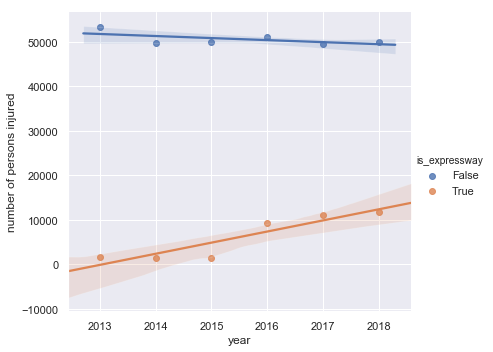

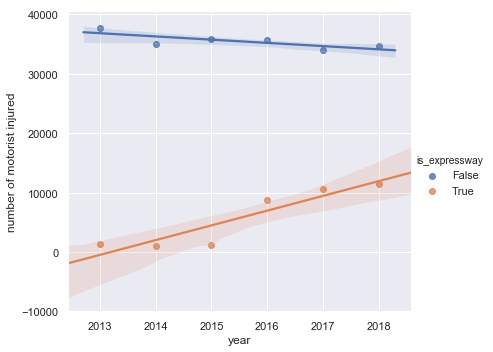

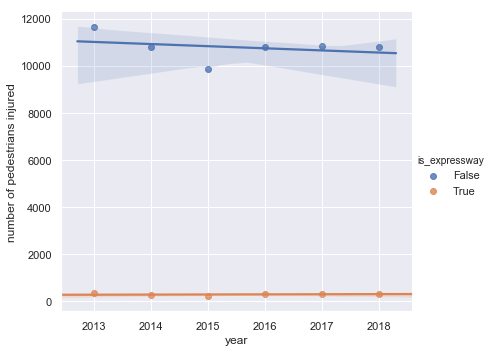

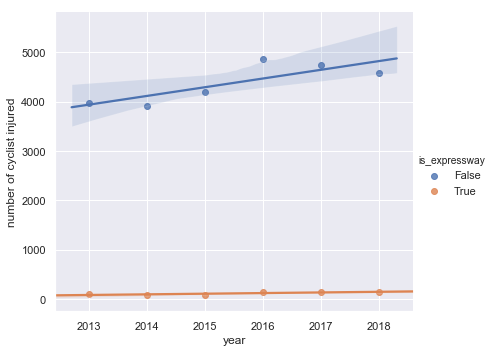

In [15]:
df_col['is_expressway'] = df_col['road_type'].apply(lambda x: x in ['bridge','drive','expressway','parkway'])

pp = df_col.groupby(['year','is_expressway']).sum().reset_index(drop=False)
pp = pp.loc[(pp['year'] >= 2013) & (pp['year'] <= 2018)] # only year = [2014,2015,2016,2017,2018]

sns.lmplot(x='year', y="number of persons injured", hue='is_expressway', data=pp, aspect=1.2) # https://seaborn.pydata.org/tutorial/regression.html
sns.lmplot(x='year', y="number of motorist injured", hue='is_expressway', data=pp, aspect=1.2) # https://seaborn.pydata.org/tutorial/regression.html
sns.lmplot(x='year', y="number of pedestrians injured", hue='is_expressway', data=pp, aspect=1.2) # https://seaborn.pydata.org/tutorial/regression.html
sns.lmplot(x='year', y="number of cyclist injured", hue='is_expressway', data=pp, aspect=1.2) # https://seaborn.pydata.org/tutorial/regression.html
plt.show()

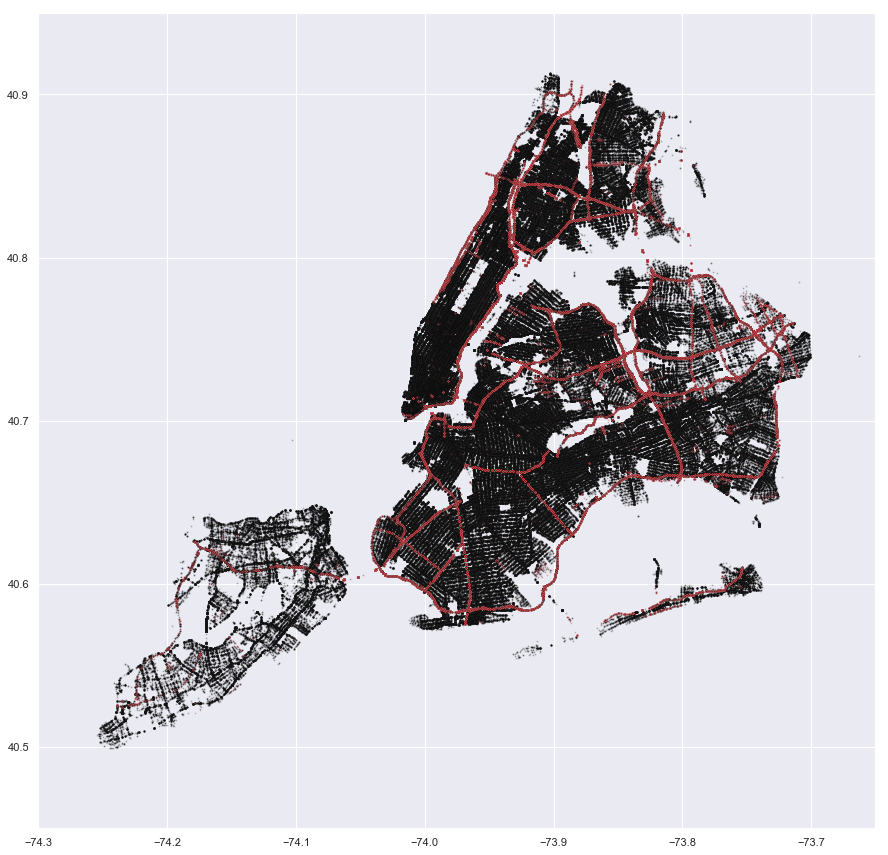

In [16]:
xx = df_col.loc[df_col['is_expressway']==False, 'longitude']
yy = df_col.loc[df_col['is_expressway']==False, 'latitude']

fig, ax = plt.subplots(figsize=(15,15))
ax.plot(xx, yy, 'o', markerfacecolor='none', markeredgecolor='k', alpha=0.2, markersize=1)

x0 = df_col.loc[df_col['is_expressway']==True, 'longitude']
y0 = df_col.loc[df_col['is_expressway']==True, 'latitude']
ax.plot(x0, y0, 'o', markerfacecolor='none', markeredgecolor='r', alpha=0.2, markersize=1)

plt.xlim(-74.3, -73.65)
plt.ylim(40.45, 40.95)
plt.show()

# df_col['LATITUDE'].hist(bins=100)
# df_col['LONGITUDE'].hist(bins=100)